In [2]:
# Mount GDrive
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# import needed libraries

import numpy as np
import pandas as pd
import os
#import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image
import io
from io import BytesIO
import tensorflow
#from tensorflow import keras
#from tensorflow import keras
import matplotlib.pyplot as plt
from tqdm import tqdm


In [25]:
# TF
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, optimizers, callbacks
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model

In [69]:
from google.cloud import storage

# Set path to your service account credentials file
credentials_path= '/content/drive/MyDrive/Karlobyo/Leukemic_Cell_Detective/ziobiddu.json'
# Create a client object using the credentials file
client = storage.Client.from_service_account_json(credentials_path)
bucket = client.bucket('leukemic-1')

In [70]:
# setting files paths from GCS

all_0 = bucket.blob("C-NMC_Leukemia/training_data/fold_0/all")
all_1 = bucket.blob("C-NMC_Leukemia/training_data/fold_1/all")
all_2 = bucket.blob("C-NMC_Leukemia/training_data/fold_2/all")

hem_0 = bucket.blob("C-NMC_Leukemia/training_data/fold_0/hem")
hem_1 = bucket.blob("C-NMC_Leukemia/training_data/fold_1/hem")
hem_2 = bucket.blob("C-NMC_Leukemia/training_data/fold_2/hem")

In [3]:

# func to get the paths of the images

def get_path_image(folder):
    image_paths = []
    for blob in bucket.list_blobs(prefix=folder.name):
        image_path = blob.name
        image_paths.append(image_path)
    return image_paths

In [4]:
# fetch training data paths

img_data = []

for i in [all_0, all_1, all_2, hem_0, hem_1, hem_2]:
    paths = get_path_image(i)

    img_data.extend(paths)

print(len(img_data))

NameError: name 'all_0' is not defined

In [73]:
# df for data paths

data_train = {"img_data":img_data,
        "labels":[np.nan for x in range(len(img_data))]}

data_train_df = pd.DataFrame(data_train)
data_train_df

,img_data,labels
0,C-NMC_Leukemia/training_data/fold_0/all/UID_11...,NaN
1,C-NMC_Leukemia/training_data/fold_0/all/UID_11...,NaN
2,C-NMC_Leukemia/training_data/fold_0/all/UID_11...,NaN
3,C-NMC_Leukemia/training_data/fold_0/all/UID_11...,NaN
4,C-NMC_Leukemia/training_data/fold_0/all/UID_11...,NaN
...,...,...
10656,C-NMC_Leukemia/training_data/fold_2/hem/UID_h3...,NaN
10657,C-NMC_Leukemia/training_data/fold_2/hem/UID_h3...,NaN
10658,C-NMC_Leukemia/training_data/fold_2/hem/UID_h3...,NaN
10659,C-NMC_Leukemia/training_data/fold_2/hem/UID_h3...,NaN


,img_data,labels
0,C-NMC_Leukemia/training_data/fold_0/all/UID_11...,NaN
1,C-NMC_Leukemia/training_data/fold_0/all/UID_11...,NaN
2,C-NMC_Leukemia/training_data/fold_0/all/UID_11...,NaN
3,C-NMC_Leukemia/training_data/fold_0/all/UID_11...,NaN
4,C-NMC_Leukemia/training_data/fold_0/all/UID_11...,NaN
...,...,...
10656,C-NMC_Leukemia/training_data/fold_2/hem/UID_h3...,NaN
10657,C-NMC_Leukemia/training_data/fold_2/hem/UID_h3...,NaN
10658,C-NMC_Leukemia/training_data/fold_2/hem/UID_h3...,NaN
10659,C-NMC_Leukemia/training_data/fold_2/hem/UID_h3...,NaN


,img_data,labels
0,C-NMC_Leukemia/training_data/fold_0/all/UID_11...,NaN
1,C-NMC_Leukemia/training_data/fold_0/all/UID_11...,NaN
2,C-NMC_Leukemia/training_data/fold_0/all/UID_11...,NaN
3,C-NMC_Leukemia/training_data/fold_0/all/UID_11...,NaN
4,C-NMC_Leukemia/training_data/fold_0/all/UID_11...,NaN
...,...,...
10656,C-NMC_Leukemia/training_data/fold_2/hem/UID_h3...,NaN
10657,C-NMC_Leukemia/training_data/fold_2/hem/UID_h3...,NaN
10658,C-NMC_Leukemia/training_data/fold_2/hem/UID_h3...,NaN
10659,C-NMC_Leukemia/training_data/fold_2/hem/UID_h3...,NaN


In [74]:
data_train_df.loc[0:7272, 'labels'] = 1 # ALL
data_train_df.loc[7272:, 'labels'] = 0 # HEM

In [75]:
data_train_df['labels'].value_counts()

labels
1.0    7272
0.0    3389
Name: count, dtype: int64

labels
1.0    7272
0.0    3389
Name: count, dtype: int64

labels
1.0    7272
0.0    3389
Name: count, dtype: int64

In [76]:

data_train_df["img_data"][0]

'C-NMC_Leukemia/training_data/fold_0/all/UID_11_10_1_all.bmp'

'C-NMC_Leukemia/training_data/fold_0/all/UID_11_10_1_all.bmp'

'C-NMC_Leukemia/training_data/fold_0/all/UID_11_10_1_all.bmp'

In [77]:

BUCKET_URL="gs://leukemic-1/C-NMC_Leukemia/"


In [26]:

train_data_dir = "/Users/carlobarbini/Downloads/lcdet_data/training_data/"
val_data_dir = "/Users/carlobarbini/Downloads/lcdet_data/validation_data/"

In [27]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img = load_img(f"{train_data_dir}/1_all/UID_11_10_1_all.bmp")
x = img_to_array(img)/255  # We divide the pixel value by 255 to end up between 0 and 1

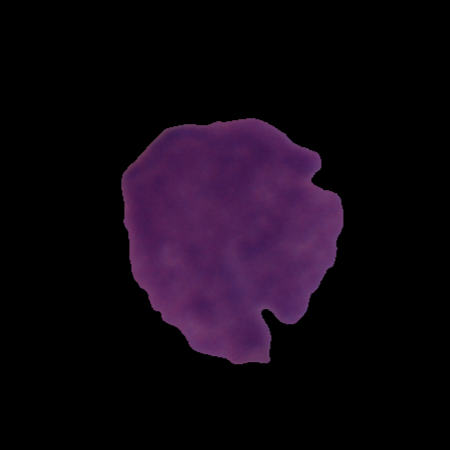

In [28]:
img

In [80]:
type(img)

PIL.BmpImagePlugin.BmpImageFile

PIL.BmpImagePlugin.BmpImageFile

PIL.BmpImagePlugin.BmpImageFile

In [29]:

batch_size=16

In [30]:
# train data

train_ds = image_dataset_from_directory(
  train_data_dir,
  labels = "inferred",
  label_mode = "binary",
  seed=123,
  image_size=(224, 224),
  batch_size=batch_size)


Found 7889 files belonging to 2 classes.


In [31]:

# val data

val_ds = image_dataset_from_directory(
  val_data_dir,
  labels = "inferred",
  label_mode = "binary",
  seed=123,
  image_size=(224, 224),
  batch_size=batch_size)

Found 2772 files belonging to 2 classes.


In [32]:
class_names = train_ds.class_names
print(class_names)

['0_hem', '1_all']


In [33]:
class_names = val_ds.class_names
print(class_names)

['0_hem', '1_all']


In [86]:

model = Sequential()

model.add(layers.Rescaling(1./255, input_shape = (224, 224, 3)))
model.add(layers.Conv2D(filters = 16, kernel_size = (3,3), activation="relu", padding = "same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )


model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", padding = "same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )

model.add(layers.Dropout(0.5))

#model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation="relu", padding = "same"))
#model.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )

#model.add(layers.Conv2D(filters = 128, kernel_size = (3,3), activation="relu", padding = "same"))
#model.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )

# Here we flatten our data to end up with just one dimension
model.add(layers.Flatten())


model.add(layers.Dense(16, activation="relu"))

model.add(layers.Dropout(0.5))

# And we perform the prediction using sigmoid
model.add(layers.Dense(1, activation="sigmoid"))

In [87]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 56, 56, 32)        0

In [88]:

adam = optimizers.Adam(learning_rate = 0.001)
model.compile(loss='binary_crossentropy',
              optimizer= adam,
              metrics=['accuracy'])


In [89]:


MODEL = "model_1"

modelCheckpooint = callbacks.ModelCheckpoint("{}.h5".format(MODEL), monitor="val_loss", verbose=0, save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss", factor = 0.1, patience=3, verbose=1, min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, restore_best_weights=True)


In [90]:
%%time
#history = model.fit(
#        train_ds,
#        epochs=30,
#        validation_data=val_ds,
#        callbacks = [modelCheckpooint, LRreducer, EarlyStopper])


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.39 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


In [34]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [35]:
def plot_compare_history(history, name_history, history_1, name_history_1):

    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    ax[0].set_title('loss')

    ax[0].plot(history.epoch, history.history["loss"], label="Train loss " + name_history)
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss " + name_history)

    ax[0].plot(history_1.epoch, history_1.history["loss"], label="Train loss " + name_history_1)
    ax[0].plot(history_1.epoch, history_1.history["val_loss"], label="Validation loss " + name_history_1)

    ax[1].set_title('Accuracy')

    ax[1].plot(history.epoch, history.history["accuracy"], label="Train Accuracy " + name_history)
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation Accuracy " + name_history)

    ax[1].plot(history_1.epoch, history_1.history["accuracy"], label="Train Accuracy " + name_history_1)
    ax[1].plot(history_1.epoch, history_1.history["val_accuracy"], label="Validation Accuracy " + name_history_1)

    ax[0].legend()
    ax[1].legend()

In [36]:
base_model = VGG16(weights = "imagenet", include_top = False, input_shape = (224, 224, 3))

In [40]:
# First step is to initialize the VGG16 model but without the top as we'll adapt it to our problem


inputs = layers.Input(shape = (224, 224, 3))

#x = data_augmentation(inputs) # We still have our data augmentation layers
x = preprocess_input(inputs) # Then a preprocessing layer specifically designed for the VGG16
x = base_model(x) # Then our transfer learning model

x = layers.Flatten()(x) # Followed by our custom dense layers, tailored to our binary task

#x = layers.Dense(32, activation = "relu")(x)
#x = layers.Dropout(0.3)(x)
x = layers.Dense(16, activation = "relu")(x)
x = layers.Dropout(0.3)(x)
pred = layers.Dense(1, activation = "sigmoid")(x)

# We use the keras Functional API to create our keras model

model_3 = Model(inputs = inputs , outputs = pred)

# And we freeze the VGG16 model

base_model.trainable = False


In [41]:

adam = optimizers.Adam(learning_rate = 0.01)
model_3.compile(loss='binary_crossentropy',
              optimizer= adam,
              metrics=['accuracy'])


In [42]:


MODEL = "model_1"

modelCheckpooint = callbacks.ModelCheckpoint("{}.h5".format(MODEL), monitor="val_loss", verbose=0, save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss", factor = 0.1, patience=3, verbose=1, min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, restore_best_weights=True)


In [43]:
%%time
history = model_3.fit(
        train_ds,
        epochs=30,
        validation_data=val_ds,
        callbacks = [modelCheckpooint, LRreducer, EarlyStopper])


Epoch 1/30
242/494 [=============>................] - ETA: 3:56 - loss: 1.8155 - accuracy: 0.6981

KeyboardInterrupt: 

In [99]:
model_3.save("model_3.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [100]:
from tensorflow.keras.models import load_model

model_3 = load_model("model_3.h5")